In [1]:
import json
import pickle
import numpy as np
import plot_config
import matplotlib.pyplot as plt

data_dir = 'results/'

batch_adagrad_file = "MLP_1_Batchsize_AdaGrad.json"
batch_sgd_file = "MLP_1_Batchsize_SGD.json"
lr_adagrad_file = "MLP_1_LearningRate_AdaGrad.json"
lr_sgd_file = "MLP_1_LearningRate_SGD.json"

In [2]:
def open_json(file):
    with open(data_dir + file) as f:
        data = json.load(f)
    return data

batch_adagrad_data = open_json(batch_adagrad_file)
batch_sgd_data = open_json(batch_sgd_file)
lr_adagrad_data = open_json(lr_adagrad_file)
lr_sgd_data = open_json(lr_sgd_file)

In [3]:
def plot_data(effect_variable, effect_name, sharpness, errors, plot_type):
    plt.figure(figsize=(8, 6))
    cmap = plt.get_cmap('jet')
    c = cmap(np.linspace(0, 0.20, 2))

    # Plot the data with error bars
    plt.errorbar(effect_variable, sharpness, yerr=errors, fmt='o', color=c[0], capsize=7, ecolor=c[0])
    plt.plot(effect_variable, sharpness, color=c[1], linestyle=':', alpha=0.5)

    if effect_name == 'Batchsize':
        plt.xlabel('Batch Size')
    if effect_name == 'LearningRate':
        plt.xlabel('Learning Rate')

    if plot_type == 'loglog':
        plt.xscale('log')
        plt.yscale('log')
    elif plot_type == 'semilogx':
        plt.xscale('log')
    elif plot_type == 'semilogy':
        plt.yscale('log')

    plt.ylabel('Sharpness')

    plt.grid(True, which="both", ls="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

In [4]:
batch_adagrad_sharpness = batch_adagrad_data['list_of_sharpness_mean']
batch_sgd_sharpness = batch_sgd_data['list_of_sharpness_mean']
lr_adagrad_sharpness = lr_adagrad_data['list_of_sharpness_mean']
lr_sgd_sharpness = lr_sgd_data['list_of_sharpness_mean']

batch_adagrad_batchsize = batch_adagrad_data['effect']
batch_sgd_batchsize = batch_sgd_data['effect']
lr_adagrad_lr = lr_adagrad_data['effect']
lr_sgd_lr = lr_sgd_data['effect']

batch_adagrad_batchsize_effect = batch_adagrad_data['effect_name']
batch_sgd_batchsize_effect = batch_sgd_data['effect_name']
lr_adagrad_lr_effect = lr_adagrad_data['effect_name']
lr_sgd_lr_effect = lr_sgd_data['effect_name']

batch_adagrad_batchsize_error = batch_adagrad_data['errors']
batch_sgd_batchsize_error = batch_sgd_data['errors']
lr_adagrad_lr_error = lr_adagrad_data['errors']
lr_sgd_lr_error = lr_sgd_data['errors']

batch_adagrad_optimizer = batch_adagrad_data['optimizer']
batch_sgd_optimizer = batch_sgd_data['optimizer']
lr_adagrad_optimizer = lr_adagrad_data['optimizer']
lr_sgd_optimizer = lr_sgd_data['optimizer']

In [5]:
def plot_effect_vs_optimizer(effect_variables, effect_names, sharpness, errors, optimizers, plot_type, side_by_side=False, fig=None, axs=None):
    n_plots = len(effect_variables)

    if fig is None or axs is None:
        if side_by_side:
            fig, axs = plt.subplots(1, n_plots, figsize=(12, 6))
        else:
            fig, axs = plt.subplots(1, 1, figsize=(8, 6))
            axs = [axs]

    cmap = plt.get_cmap('jet')
    c = [cmap(np.linspace(0, 0.15, 2)), cmap(np.linspace(0.85, 1, 2))]

    for i in range(n_plots):
        ax = axs[i] if side_by_side else axs[0]
        color_sgd, color_adagrad = c[0][min(i, len(c[0])-1)], c[1][min(i, len(c[1])-1)]

        if optimizers[i] == 'SGD':
            ax.errorbar(effect_variables[i], sharpness[i], yerr=errors[i], fmt='o', color=color_sgd, capsize=9, ecolor=color_sgd, label='SGD', mec='black', ms=8, elinewidth=2, capthick=1.5)
            ax.plot(effect_variables[i], sharpness[i], color=color_sgd, linestyle=':', alpha=0.6)
        if optimizers[i] == 'AdaGrad':
            ax.errorbar(effect_variables[i], sharpness[i], yerr=errors[i], fmt='*', color=color_adagrad, capsize=9, ecolor=color_adagrad, label='AdaGrad', mec='black', ms=12, elinewidth=2, capthick=1.5)
            ax.plot(effect_variables[i], sharpness[i], color=color_adagrad, linestyle=':', alpha=0.6)

        if effect_names[i] == 'Batchsize':
            ax.set_xlabel(r'\textbf{Batch Size}')
        if effect_names[i] == 'LearningRate':
            ax.set_xlabel(r'\textbf{Learning Rate}')

        ax.set_ylabel(r'\textbf{Sharpness}')
        ax.grid(True, which="both", ls="--", alpha=0.4)
        ax.legend()

        if plot_type == 'loglog':
            ax.set_xscale('log')
            ax.set_yscale('log')
        elif plot_type == 'semilogx':
            ax.set_xscale('log')
        elif plot_type == 'semilogy':
            ax.set_yscale('log')

    plt.tight_layout()
    return fig, axs

In [6]:
batch_effect = [batch_adagrad_batchsize, batch_sgd_batchsize]
batch_effect_name = [batch_adagrad_batchsize_effect, batch_sgd_batchsize_effect]
batch_sharpness = [batch_adagrad_sharpness, batch_sgd_sharpness]
batch_errors = [batch_adagrad_batchsize_error, batch_sgd_batchsize_error]
batch_optimizers = [batch_adagrad_optimizer, batch_sgd_optimizer]

lr_effect = [lr_adagrad_lr, lr_sgd_lr]
lr_effect_name = [lr_adagrad_lr_effect, lr_sgd_lr_effect]
lr_sharpness = [lr_adagrad_sharpness, lr_sgd_sharpness]
lr_errors = [lr_adagrad_lr_error, lr_sgd_lr_error]
lr_optimizers = [lr_adagrad_optimizer, lr_sgd_optimizer]

In [7]:
SAVE_FIGURES = False

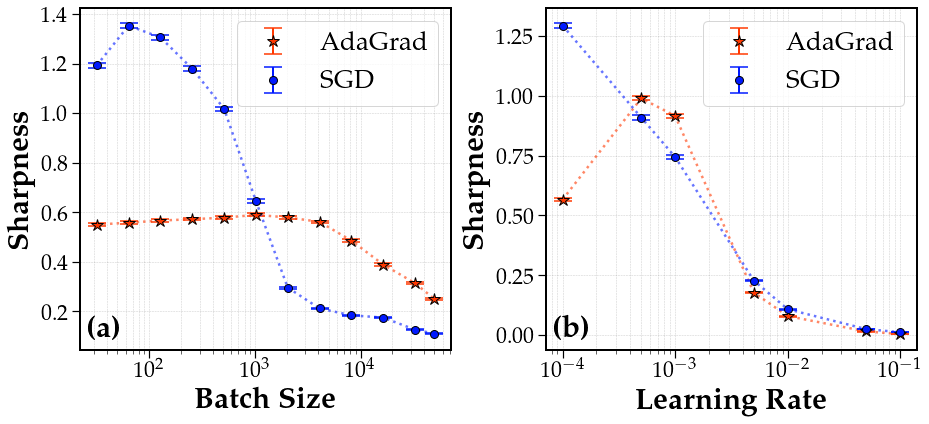

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

plot_effect_vs_optimizer(batch_effect, batch_effect_name, batch_sharpness, batch_errors, batch_optimizers, 
                         'semilogx', side_by_side=False, fig=fig, axs=[ax[0]])
plot_effect_vs_optimizer(lr_effect, lr_effect_name, lr_sharpness, lr_errors, lr_optimizers,
                         'semilogx', side_by_side=False, fig=fig, axs=[ax[1]])
ax[0].text(0.02, 0.1, r'\textbf{(a)}', transform=ax[0].transAxes, fontsize=30, verticalalignment='top')
ax[1].text(0.02, 0.1, r'\textbf{(b)}', transform=ax[1].transAxes, fontsize=30, verticalalignment='top')

if SAVE_FIGURES:
    plt.savefig('results/sharpness_vs_B_lr_optim_bold2.pdf', bbox_inches='tight')
    with open('results/sharpness_vs_B_lr_optim_bold2.pkl', 'wb') as f:
        pickle.dump(fig, f)

plt.show()